In [ ]:
# mümkünse yine gpu kullanıyoruz 40gb vram çok daha rahat oluyor
import torch
import os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
!pip install transformers sentence-transformers scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
from huggingface_hub import login

# yine a şıkkındaki gibi api key gerekirse diye işliyoruz
login("API_KEYIM")

In [ ]:
# a şıkkındakinin aynısı ihtiyaç olursa diye ekledim
category_mapping = {
    0: "siyaset",
    1: "dunya",
    2: "ekonomi",
    3: "kultur",
    4: "saglik",
    5: "spor",
    6: "teknoloji"
}

In [ ]:
# birebir a şıkkının aynısı olarak işlemleri yaptık sadece modeller embedding modeli olarak değiştirildi
!pip install datasets
from transformers import pipeline
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

ttc4900 = load_dataset("savasy/ttc4900")
trsav1 = load_dataset("maydogan/TRSAv1")

ttc4900_split = ttc4900['train'].train_test_split(test_size=0.2, seed=42)
train_ttc4900 = ttc4900_split['train']
test_ttc4900 = ttc4900_split['test']
print(type(test_ttc4900[0]['category']))

trsav1_sample = trsav1['train'].select(range(5000))
trsav1_split = trsav1_sample.train_test_split(test_size=0.2, seed=42)
train_trsav1 = trsav1_split['train']
test_trsav1 = trsav1_split['test']

ttc4900_candidate_labels = ["0", "1", "2", "3", "4", "5","6"]
trsav1_candidate_labels = ["Positive", "Neutral", "Negative"]

datasets = {
    "ttc4900": test_ttc4900,
    "trsav1": test_trsav1,
}

embedding_models = {
    "BERTurk": SentenceTransformer("dbmdz/bert-base-turkish-cased"),
    "e5-small": SentenceTransformer("intfloat/e5-base-v2"),
    "jina": SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True),
    "Turkish-USE": SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2"),
    "T5-Base": SentenceTransformer("google/mt5-base"),
}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/5.51M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4900 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/708 [00:00<?, ?B/s]

TRSAv1.csv:   0%|          | 0.00/16.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/150000 [00:00<?, ? examples/s]

<class 'int'>


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/734k [00:00<?, ?B/s]

custom_st.py:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v3:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/49.9k [00:00<?, ?B/s]

block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- mha.py
- stochastic_depth.py
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- block.py
- xlm_padding.py
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_lora.py
- modeling_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# eğitmek istediğim yöntemleri belirledim
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}

In [ ]:
results = []

# embeddingleri datasetlerin ikisini de dönerek oluşturuyorum yine a şıkkında yaparak öğrendiğim yöntemle her işlem bittiğinde memoryde yer açmak adına del komutu ile siliyorum
for dataset_name, dataset in datasets.items():
    print(f"Processing dataset: {dataset_name}")
    if dataset_name == "ttc4900":
        texts = dataset["text"]
        labels = dataset["category"]
        candidate_labels = ttc4900_candidate_labels
    elif dataset_name == "trsav1":
        texts = dataset["review"]
        labels = dataset["score"]
        candidate_labels = trsav1_candidate_labels



    for embed_name, embed_model in embedding_models.items():
        print(f"  Using embedding model: {embed_name}")
        embeddings = embed_model.encode(texts, convert_to_tensor=True)

        embedding_file_name = f"{dataset_name}_{embed_name}_embeddings.pt"
        torch.save(embeddings, embedding_file_name)

        for clf_name, clf in classifiers.items():
            print(f"    Training classifier: {clf_name}")

            X_train = embeddings[:int(len(embeddings)*0.8)].to(torch.float32).cpu().numpy()
            X_test = embeddings[int(len(embeddings)*0.8):].to(torch.float32).cpu().numpy()
            y_train = labels[:int(len(labels)*0.8)]
            y_test = labels[int(len(labels)*0.8):]

            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            results.append({
                "Dataset": dataset_name,
                "Embedding": embed_name,
                "Classifier": clf_name,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1 Score": f1,
            })
            print(f"    Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
            torch.cuda.empty_cache()
        torch.cuda.empty_cache()
        del(embed_model)
    torch.cuda.empty_cache()
    del(texts)
    del(labels)
    del(embeddings)
    del(X_train)
    del(X_test)
    del(y_train)
    del(y_test)
    del(dataset)

In [ ]:
# çıktıları yazdırdım
results_df = pd.DataFrame(results)

print(results_df)

    Dataset    Embedding           Classifier  Accuracy  Precision    Recall  \
0   ttc4900      BERTurk        Random Forest  0.836735   0.839976  0.836735   
1   ttc4900      BERTurk                  SVM  0.882653   0.888998  0.882653   
2   ttc4900      BERTurk  Logistic Regression  0.872449   0.875560  0.872449   
3   ttc4900     e5-small        Random Forest  0.709184   0.724626  0.709184   
4   ttc4900     e5-small                  SVM  0.780612   0.795202  0.780612   
5   ttc4900     e5-small  Logistic Regression  0.775510   0.797919  0.775510   
6   ttc4900         jina        Random Forest  0.841837   0.848502  0.841837   
7   ttc4900         jina                  SVM  0.913265   0.916174  0.913265   
8   ttc4900         jina  Logistic Regression  0.903061   0.906963  0.903061   
9   ttc4900  Turkish-USE        Random Forest  0.826531   0.836124  0.826531   
10  ttc4900  Turkish-USE                  SVM  0.836735   0.838548  0.836735   
11  ttc4900  Turkish-USE  Logistic Regre

In [ ]:
# görselleştirme
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


def visualize_embeddings(embeddings, labels, title="Embeddings Visualization"):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))


    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label="Classes")
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.show()

Processing dataset: ttc4900
  Using embedding model: BERTurk


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


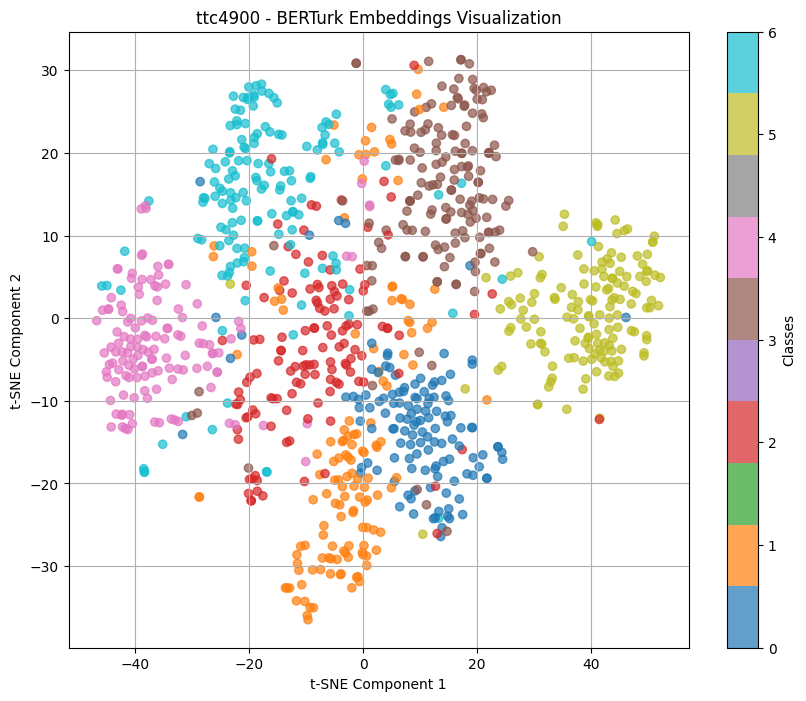

  Using embedding model: e5-small


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


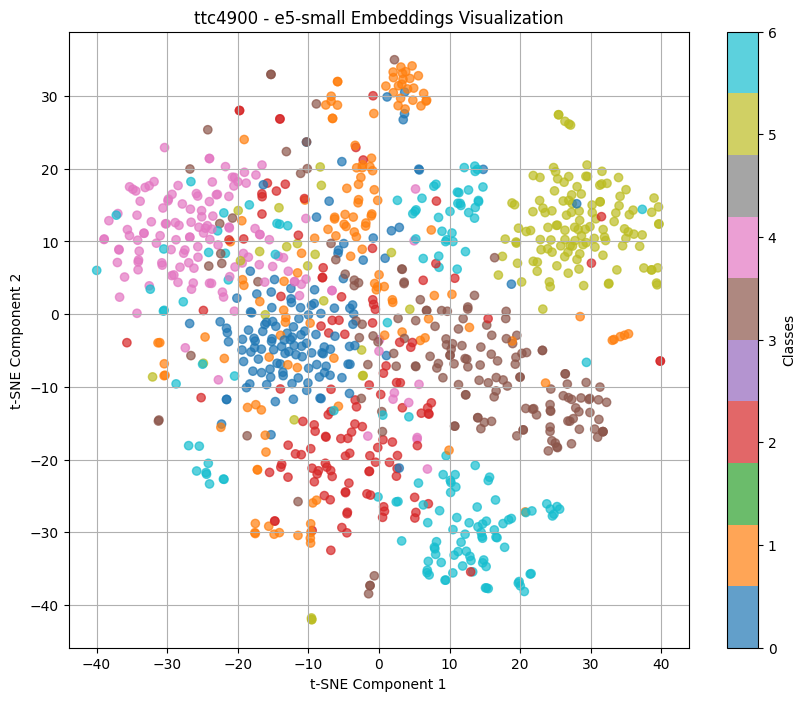

  Using embedding model: jina


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


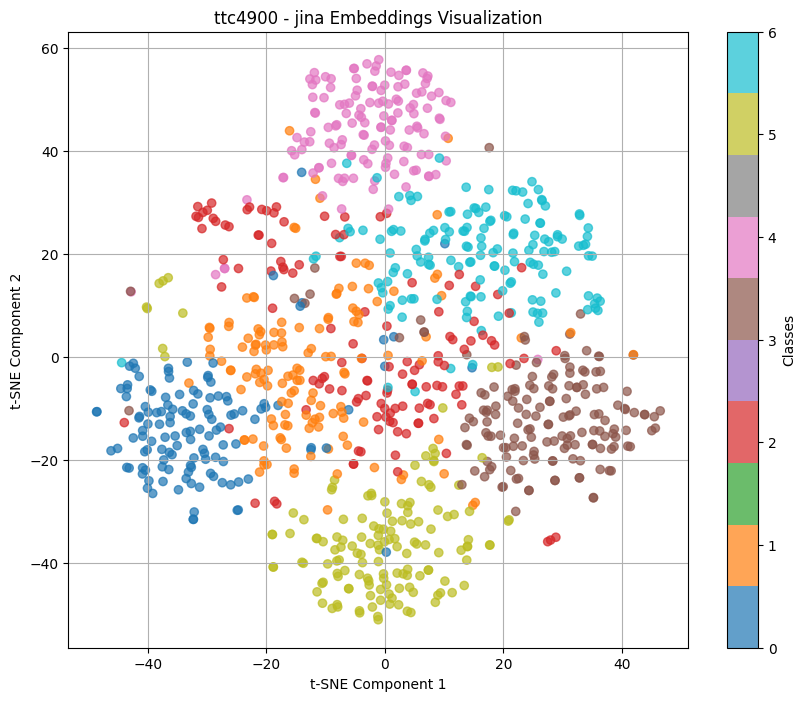

  Using embedding model: Turkish-USE


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


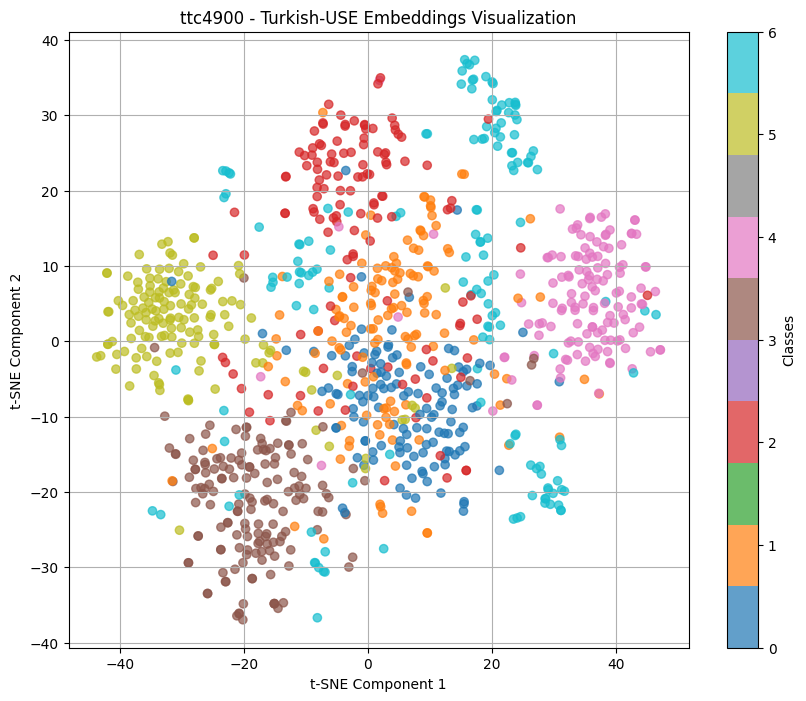

  Using embedding model: T5-Base


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


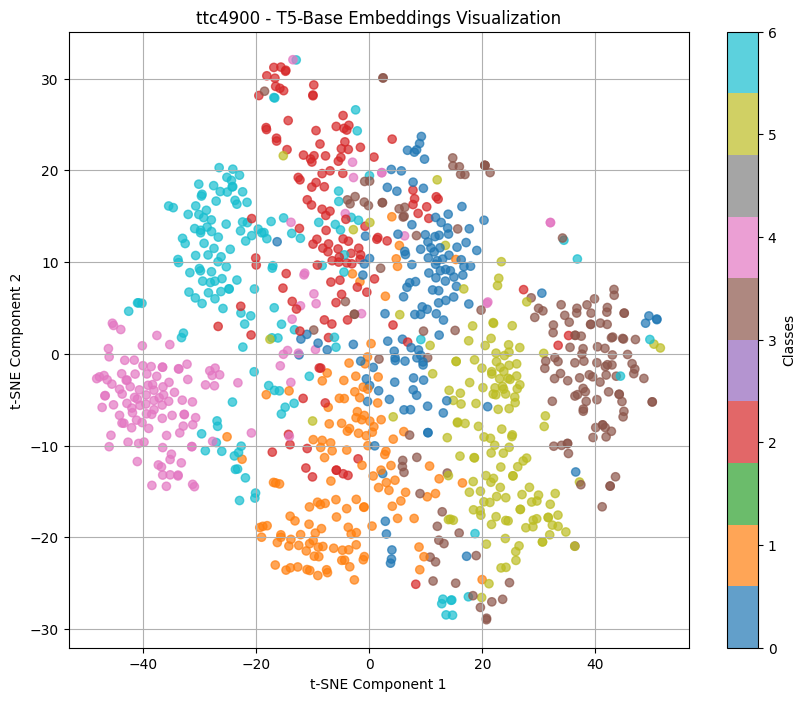

Processing dataset: trsav1
  Using embedding model: BERTurk


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


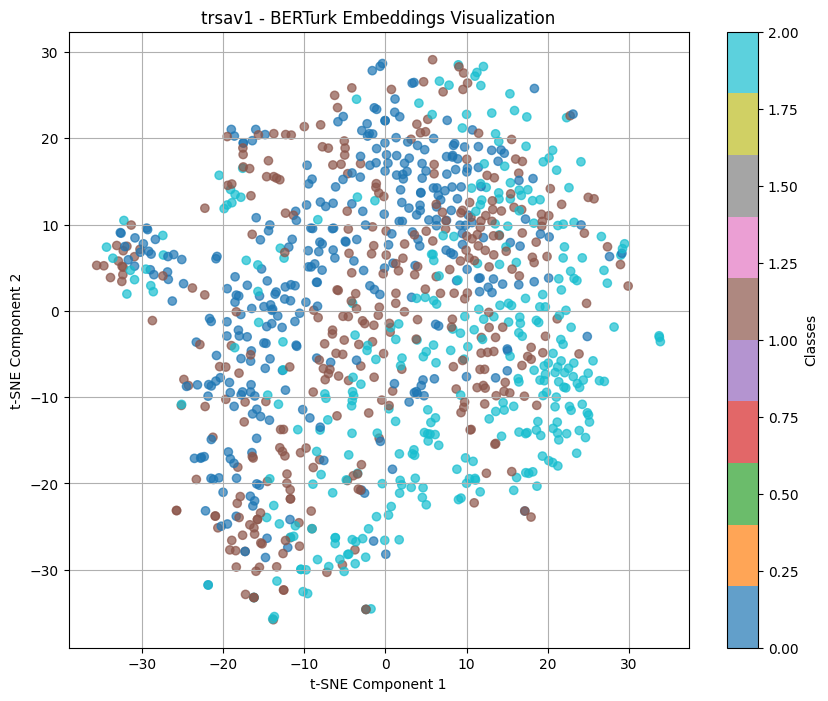

  Using embedding model: e5-small


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


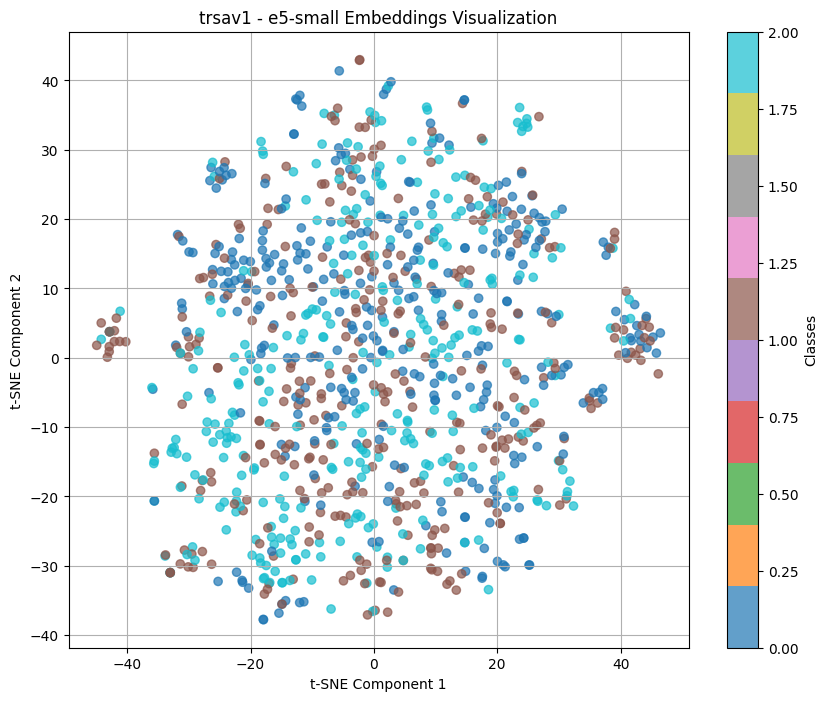

  Using embedding model: jina


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


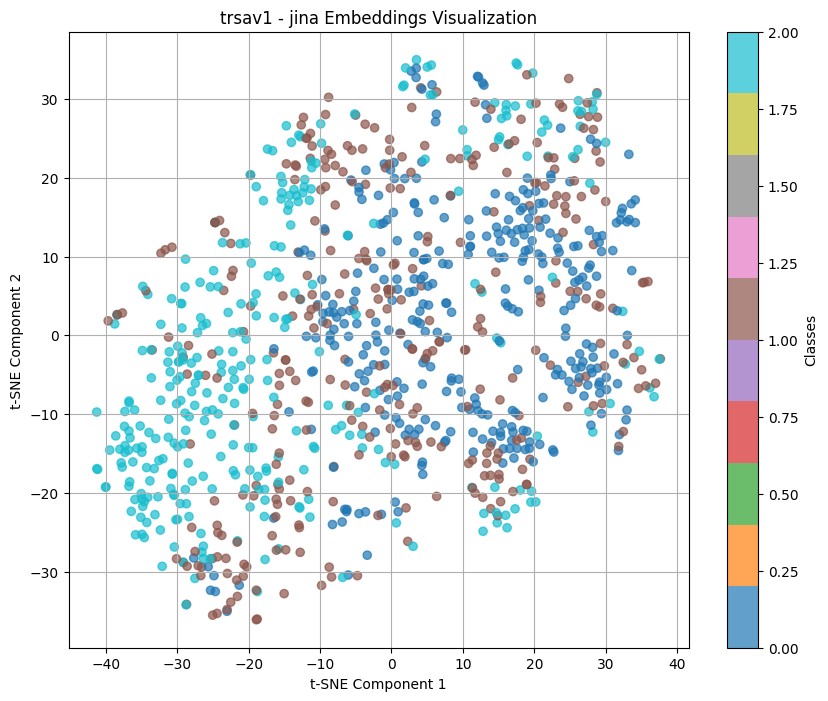

  Using embedding model: Turkish-USE


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


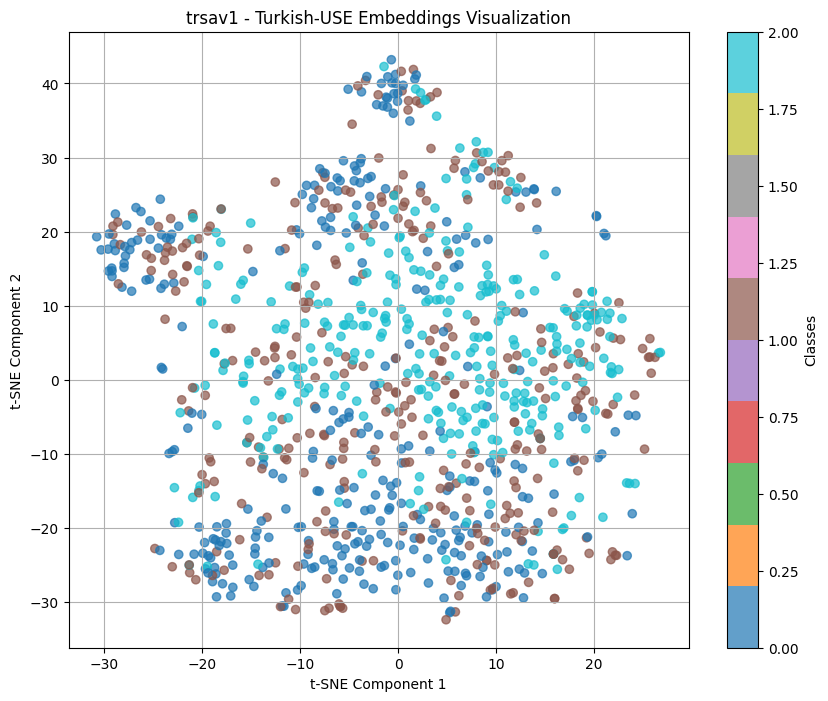

  Using embedding model: T5-Base


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


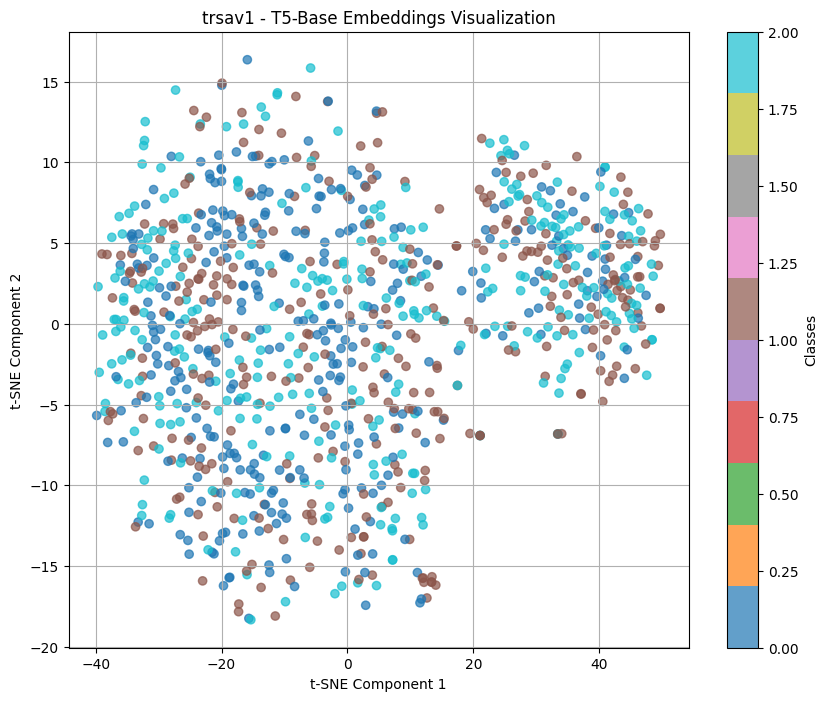

In [ ]:
# embeddingleri eğitmeden önce onları da bir grafikte görüp nasıl olacağını görmek istedim yukarıda yaptığım yöntemi biraz değiştirirerek bunu elde ettim str değerleri de int e değiştiriyorum ki embeddingleri alabiliyim tsne'de
for dataset_name, dataset in datasets.items():
    print(f"Processing dataset: {dataset_name}")
    if dataset_name == "ttc4900":
        texts = dataset["text"]
        labels = dataset["category"]
        candidate_labels = ttc4900_candidate_labels
    elif dataset_name == "trsav1":
        texts = dataset["review"]
        scores = dataset["score"]
        labels = []
        for score in scores:
          if isinstance(score, (str)):
              if score == "Negative":
                labels.append(3)
              elif score == "Neutral":
                labels.append(2)
              elif score == "Positive":
                labels.append(1)

        candidate_labels = trsav1_candidate_labels

    unique_labels = np.unique(labels)
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    numerical_labels = [label_mapping[label] for label in labels]


    for embed_name, embed_model in embedding_models.items():
        print(f"  Using embedding model: {embed_name}")
        embeddings = embed_model.encode(texts, convert_to_tensor=True)
        embeddings = embeddings.to(dtype=torch.float32).cpu().numpy()
        visualize_embeddings(embeddings, numerical_labels, title=f"{dataset_name} - {embed_name} Embeddings Visualization")
        torch.cuda.empty_cache()
        del(embed_model)
        del(embeddings)


In [ ]:
# metrikleri görselleştirme
def plot_results(df, metric):
    plt.figure(figsize=(12, 6))
    for dataset in df["Dataset"].unique():
        subset = df[df["Dataset"] == dataset]
        for embed in subset["Embedding"].unique():
            embed_subset = subset[subset["Embedding"] == embed]
            plt.plot(
                embed_subset["Classifier"],
                embed_subset[metric],
                marker="o",
                label=f"{dataset} - {embed}"
            )

    plt.title(f"{metric} Across Classifiers and Embeddings")
    plt.xlabel("Classifier")
    plt.ylabel(metric)
    plt.legend(loc="best")
    plt.grid()
    plt.show()

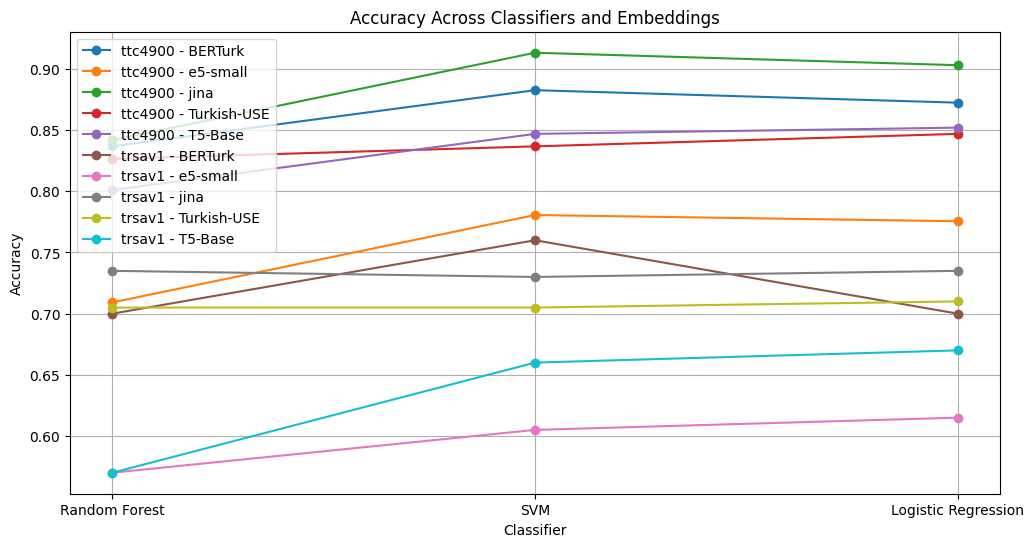

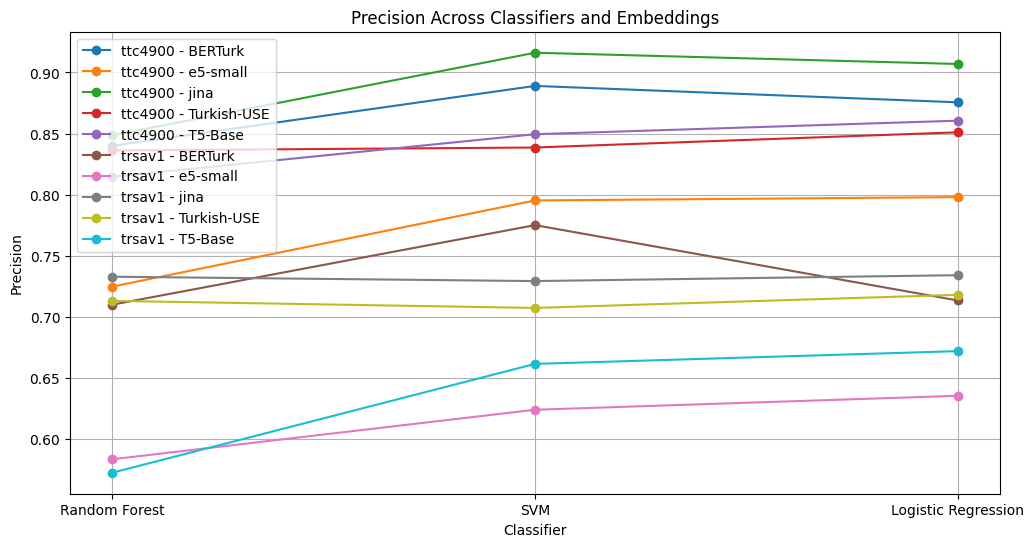

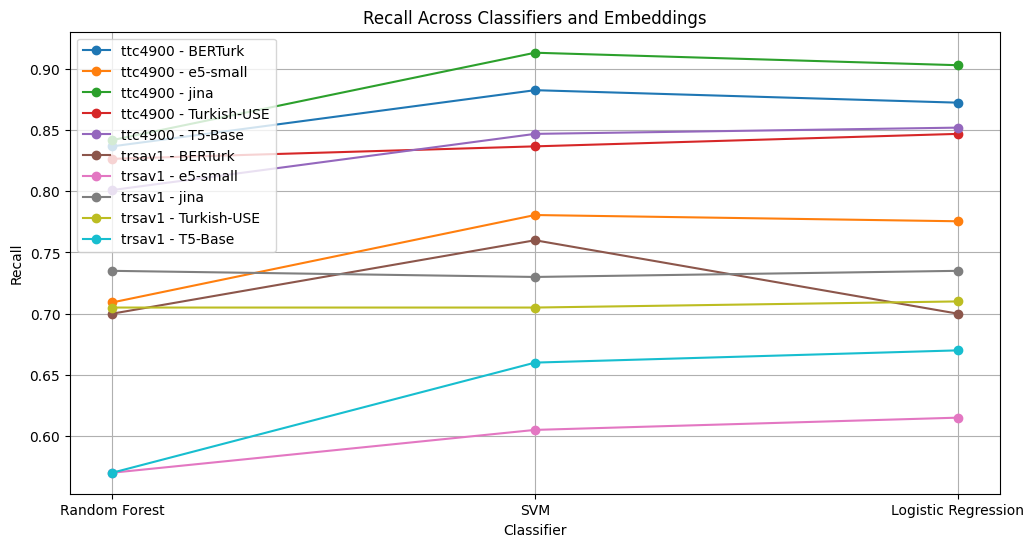

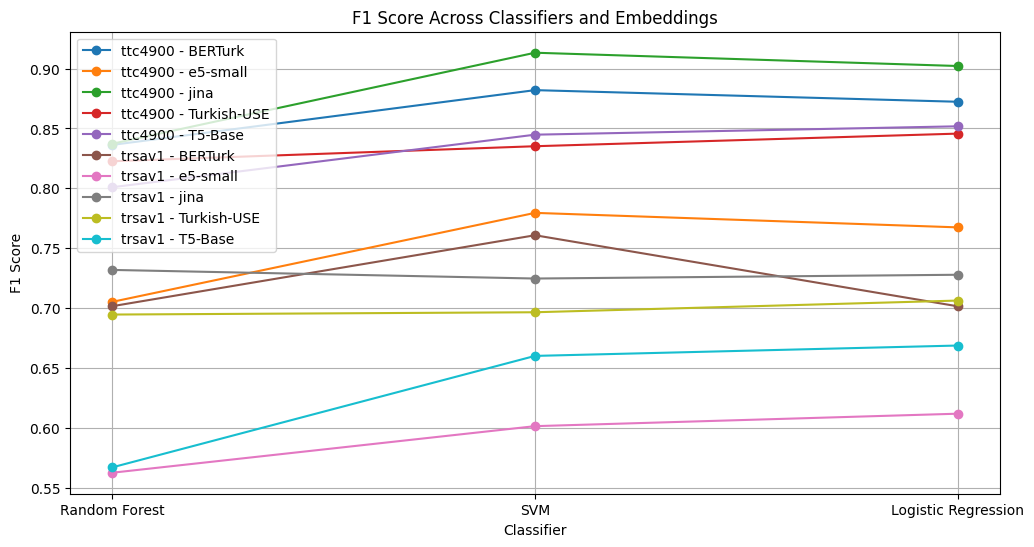

In [ ]:
# her metrik için tüm görselleri çıkarma
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_results(results_df, metric)